## Installing Required Libraries

In [1]:
pip install -U -I git+https://github.com/raghakot/keras-vis.git

  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-a6g4n7hl
  Running command git clone -q https://github.com/raghakot/keras-vis.git /tmp/pip-req-build-a6g4n7hl
  Using cached https://files.pythonhosted.org/packages/44/e1/dc0757b20b56c980b5553c1b5c4c32d378c7055ab7bfa92006801ad359ab/Keras-2.4.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0e/ba/53e1bfbdfd0f94514d71502e3acea494a8b4b57c457adbc333ef386485da/scikit_image-0.17.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d2/43/2bd63467490036697e7be71444fafc7b236923d614d4521979a200c6b559/matplotlib-3.3.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/70/7a/e53e500335afb6b1aade11227cdf107fca54106a1dca5c9d13242a043f3b/h5py-3.1.0-cp36-cp36m-manylinux1_x86_6

In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
# import necessary libraries and functions
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import InputLayer, Dense, Dropout, Flatten, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


## Loading the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/data_DL/Dataset.zip

Archive:  /content/drive/MyDrive/data_DL/Dataset.zip
replace Dataset/emergency_classification.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [5]:
# reading the csv file
data = pd.read_csv('/content/Dataset/emergency_classification.csv')

In [6]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

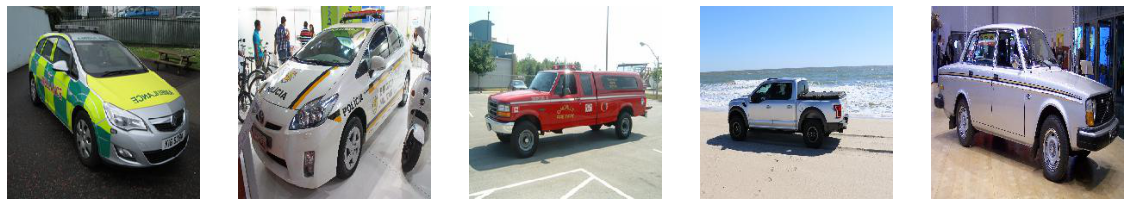

In [7]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

In [8]:
# normalizing the pixel values
X = X / X.max()

In [9]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X.astype('float32'),y,test_size=0.3, random_state=42)

In [10]:
# define vars

epochs = 10
batch_size = 128

# create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7), input_shape=(224,224,3), name='conv1'))
model.add(LeakyReLU(name='lrelu1'))
model.add(MaxPooling2D(pool_size=(4, 4), name='pool1'))
model.add(Conv2D(32, (7, 7), name='conv2'))
model.add(LeakyReLU(name='lrelu2'))
model.add(MaxPooling2D(pool_size=(4, 4), name='pool2'))
model.add(Conv2D(32, (7, 7), name='conv3'))
model.add(LeakyReLU(name='lrelu3'))
model.add(MaxPooling2D(pool_size=(4, 4), name='pool3'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid', name='preds'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [11]:
# compile the model with necessary attribute
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model = model.fit(X_train, y_train, nb_epoch=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.



Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 7s 5ms/step - loss: 0.6864 - accuracy: 0.5808 - val_loss: 0.6130 - val_accuracy: 0.6742
Epoch 2/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6225 - accuracy: 0.6598 - val_loss: 0.6064 - val_accuracy: 0.6615
Epoch 3/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.5320 - accuracy: 0.7473 - val_loss: 0.5623 - val_accuracy: 0.6898
Epoch 4/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.4790 - accuracy: 0.7722 - val_loss: 0.4610 - val_accuracy: 0.7805
Epoch 5/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.4697 - accuracy: 0.7807 - val_loss: 0.4494 - val_accuracy: 0.7932
Epoch 6/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.4460 - accuracy: 0.7965 - val_loss: 0.4405 - val_accuracy: 0.8130
Epoch 7/10
1646/1646 [==============================] - 3s 2ms/step - loss: 0.4256 - acc

## Attempt 1 - Understanding the Model Architecture 

In [12]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 218, 218, 32)      4736      
_________________________________________________________________
lrelu1 (LeakyReLU)           (None, 218, 218, 32)      0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 54, 54, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 48, 48, 32)        50208     
_________________________________________________________________
lrelu2 (LeakyReLU)           (None, 48, 48, 32)        0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 6, 6, 32)         

## Attempt 2 - Visualize Filters and Weights

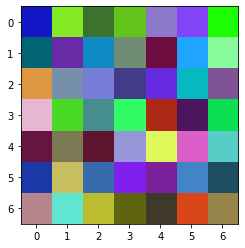

In [13]:
temp = model.get_layer('conv1').get_weights()[0][:, :, :, 0]
temp -= temp.min()
temp /= temp.max()
plt.imshow(temp)

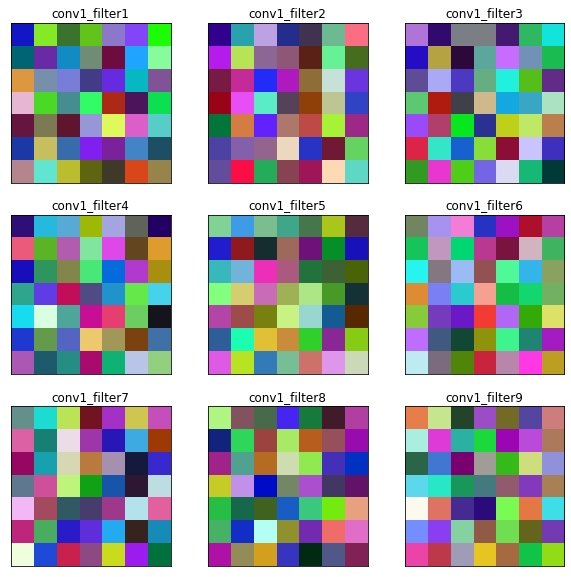

In [14]:
#plot the filters
fig,ax = plt.subplots(nrows=3,ncols=3, figsize=(10, 10))

filter_no = 1
for i in range(3):
    for j in range(3):
        temp = model.get_layer('conv1').get_weights()[0][:, :, :, filter_no - 1]
        temp -= temp.min()
        temp /= temp.max()
        ax[i][j].imshow(temp)
        ax[i][j].set_title('conv1' + '_filter' + str(filter_no))
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        filter_no += 1

### Attempt 3 - Extract Output of Intermediate Neurons/Layers

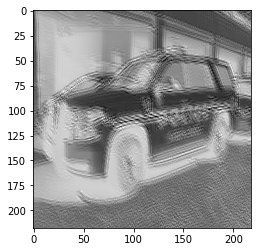

In [15]:
#importing required libraries and functions
from keras.models import Model


eg_image_idx = 5 #for example
image = X_train[eg_image_idx]

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer('conv1').output)
intermediate_output = intermediate_layer_model.predict(image)[0, :, :, 0]

plt.imshow(intermediate_output, cmap='gray')

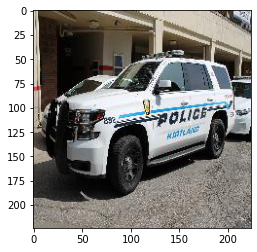

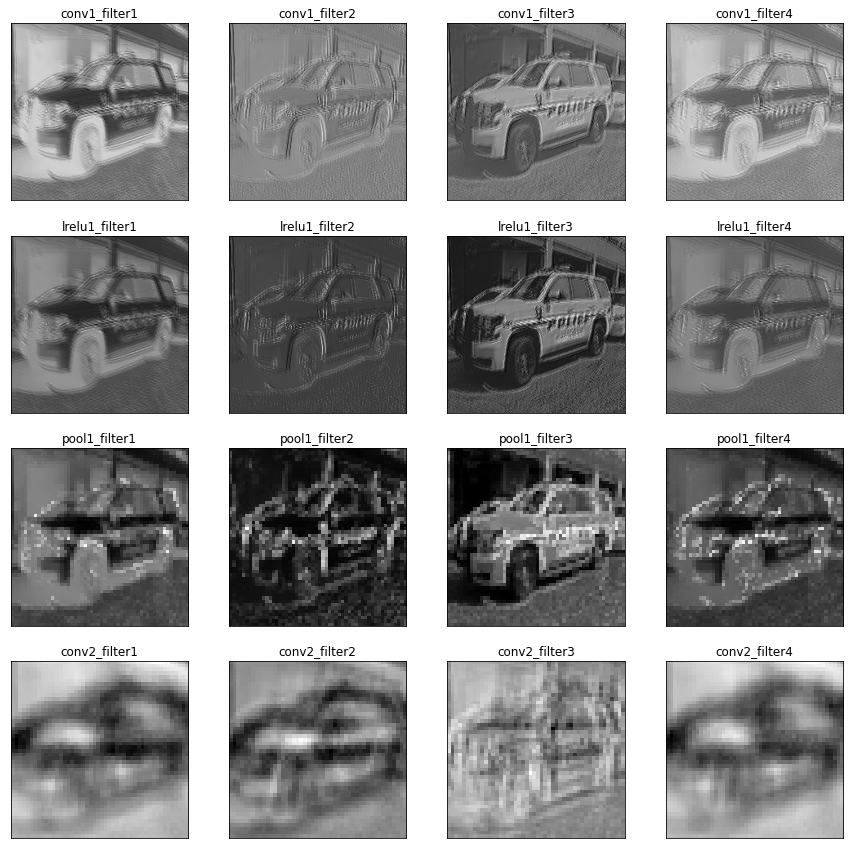

In [16]:
#defining names of layers from which we will take the output
layer_names = ['conv1','lrelu1','pool1', 'conv2']
outputs = []

eg_image_idx = 5 #for example
image = X_train[eg_image_idx]

plt.imshow(image)

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

#extracting the output and appending to outputs
for layer_name in layer_names:
    intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(image)
    outputs.append(intermediate_output)
    
#plotting the outputs
fig,ax = plt.subplots(nrows=len(outputs),ncols=4,figsize=(15,15))

for i in range(len(outputs)):
    for z in range(4):
        ax[i][z].imshow(outputs[i][0,:,:,z], cmap='gray')
        ax[i][z].set_title(layer_names[i] + '_filter' + str(z + 1))
        ax[i][z].set_xticks([])
        ax[i][z].set_yticks([])

### Attempt 4 - Locate Important parts of Image

Creating heatmap


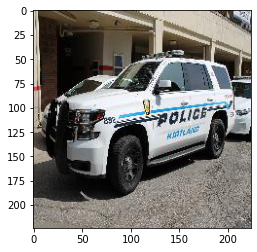

[None]

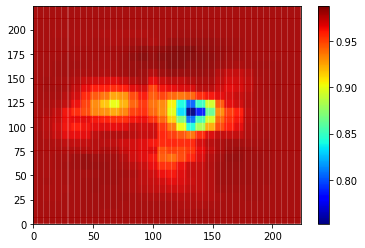

In [17]:
def iter_occlusion(image, size=4):
    # taken from https://www.kaggle.com/blargl/simple-occlusion-and-saliency-maps

   occlusion = np.full((size * 5, size * 5, 1), [0.5], np.float32)
   occlusion_center = np.full((size, size, 1), [0.5], np.float32)
   occlusion_padding = size * 2

   # print('padding...')
   image_padded = np.pad(image, ( \
   (occlusion_padding, occlusion_padding), (occlusion_padding, occlusion_padding), (0, 0) \
   ), 'constant', constant_values = 0.0)

   for y in range(occlusion_padding, image.shape[0] + occlusion_padding, size):

       for x in range(occlusion_padding, image.shape[1] + occlusion_padding, size):
           tmp = image_padded.copy()

           tmp[y - occlusion_padding:y + occlusion_center.shape[0] + occlusion_padding, \
             x - occlusion_padding:x + occlusion_center.shape[1] + occlusion_padding] \
             = occlusion

           tmp[y:y + occlusion_center.shape[0], x:x + occlusion_center.shape[1]] = occlusion_center

           yield x - occlusion_padding, y - occlusion_padding, \
             tmp[occlusion_padding:tmp.shape[0] - occlusion_padding, occlusion_padding:tmp.shape[1] - occlusion_padding]

# take example image
image = X_train[eg_image_idx]
correct_class = np.argmax(y_train[eg_image_idx])

# define variables to use
img_size = image.shape[0]
occlusion_size = 8
heatmap = np.zeros((img_size, img_size), np.float32)
class_pixels = np.zeros((img_size, img_size), np.int16)

from collections import defaultdict
counters = defaultdict(int)


print('Creating heatmap')
for n, (x, y, img_float) in enumerate(iter_occlusion(image, size=occlusion_size)):

    X = img_float.reshape(1, 224, 224, 3)
    out = model.predict(X)

    heatmap[y:y + occlusion_size, x:x + occlusion_size] = out[0][correct_class]
    class_pixels[y:y + occlusion_size, x:x + occlusion_size] = np.argmax(out)
    counters[np.argmax(out)] += 1

plt.imshow(image)

plt.show()


plt.pcolormesh(heatmap, cmap=plt.cm.jet, alpha=0.50)
plt.colorbar().solids.set(alpha=1)


Creating heatmap


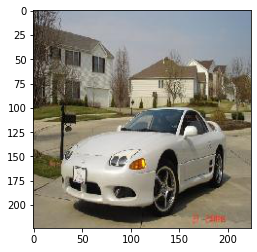

[None]

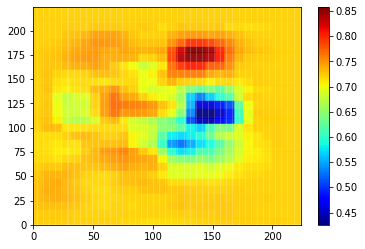

In [30]:
# take example image
eg_image_idx = 25
image = X_train[eg_image_idx]
correct_class = np.argmax(y_train[eg_image_idx])

# define variables to use
img_size = image.shape[0]
occlusion_size = 8
heatmap = np.zeros((img_size, img_size), np.float32)
class_pixels = np.zeros((img_size, img_size), np.int16)

from collections import defaultdict
counters = defaultdict(int)


print('Creating heatmap')
for n, (x, y, img_float) in enumerate(iter_occlusion(image, size=occlusion_size)):

    X = img_float.reshape(1, 224, 224, 3)
    out = model.predict(X)

    heatmap[y:y + occlusion_size, x:x + occlusion_size] = out[0][correct_class]
    class_pixels[y:y + occlusion_size, x:x + occlusion_size] = np.argmax(out)
    counters[np.argmax(out)] += 1

plt.imshow(image)

plt.show()


plt.pcolormesh(heatmap, cmap=plt.cm.jet, alpha=0.50)
plt.colorbar().solids.set(alpha=1)
